<a href="https://colab.research.google.com/github/brian-ho/intro-to-urban-data/blob/main/Measure/M01_Measure_End_to_End.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **01 Measure** End-to-End Notebook

```
    Class       ARCH 6131 Urban Design Methods / Skills / Tools 1
                The Gensler Family AAP NYC Center
                Fall 2023
                Monday 3:30 PM to 6 PM

    Instructor  Brian Ho
                brian.ho@brian-ho.io
```

This notebook demonstrates some of the Python notebook-based techniques we will use in the first module of the course. You are *not* expected to learn all of them!

Instead, this module illustrate the ways in which a little "sticky technology" can extend your workflows as an urban designer.

This includes:
- Connecting a Colab Notebook to Google Drive
- Running Python code inside of a notebook
- Installing dependencies
- Opening image files with PIL
- Viewing image metadata stored in EXIF tags
- Creating a datatable with Pandas
- Creating a geospatial datatable with GeoPandas
- Plotting tabular and geospatial data

## Connecting a Colab Notebook to Google Drive
In order to access files on your Drive account, you'll need to connect your Colab Notebook to Google Drive **each time you open the Notebook**.

The simplest way to do this is in the Colab Notebook user interface (UI) itself, but if you are running a notebook from someone else (like me) you will have to run a block of code:

1. Run the code below
3. Authorize Colab to access your Google Drive. Be sure to choose the right account (e.g. the one with the fils you'd like to access).
4. You should see a `drive` directory listed in the Files view.
5. That's it! You can now access files on your Google Drive as if they were located in a directory.

In [4]:
from google.colab import drive

drive.mount("/content/drive")

## Running Python code inside of a notebook
Notebooks are a way to write and execute Python code interactively. Just as Grasshopper enables you to write and execute geometry operations while viewing the results in Rhino, notebooks allow you to run code in "cells" and view the results right below.

The technical term for this kind of interactive computing is a read-eval-print-loop (or [REPL](https://en.wikipedia.org/wiki/Read%E2%80%93eval%E2%80%93print_loop) for short), but the important thing is that notebooks are a great way to prototype code! You can iterate more quickly on smaller chunks of logic — without having to executing a full Python file.

Let's give this a shot. Run the cell below by hovering over it and clicking the "run" icon.

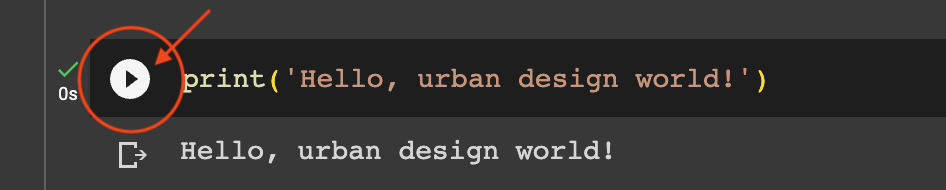

You can also run any cell by clicking into it and pressing Shift and Return together.

In [3]:
# A simple print statment
print("Hello, world!")

Hello, world!


Nice! You've run some Python code. The code above calls a function `print()`. Functions are discrete chunks of code that run when called:

- `print()` is a function that takes a single argument — the string to print — and returns it below the cell

Try changing the print statement, and running the cell again.

In [4]:
# The same print function with a different argument
print("Urban design robot says: 'Hello, urbanized world!'")

Urban design robot says: 'Hello, urbanized world!'



Notice that the number in brackets to the left of the cell increments each time. This is the sequence order of the cells. If the number is `[1]`, then this is the first cell that has been run in the notebook. This number resets each time you open a notebook, or restart the runtime.

In this course, you'll be introduced to Python through scripts and helper functions created for you. There's no expectation that you will become fluent — that's a process that takes years. But as you learn and explore this semester, you'll begin to pick up how to understand what is happening in the code, modify it, and eventually write some bits of it yourself.

⚠ **Reminder to run each cell**

*All the cells in this notebook are meant to be run in order. You'll need to run each cell in order to execute the code. If you want to update a variable or function, you'll need to run the associated cell to update it!*

## Installing dependencies
Python is a programming language. If you wanted, you could write everything yourself. But much like Grasshopper, there's an entire universe of ready-made code that is intended for common use. In Grasshopper we call these "plug-ins"; in Python these are generally referred to as "libraries" or "packages".

Colab comes with many common libraries pre-installed. For our purposes, that's almost everything you need! In this notebook, however, there are a few libraries we need that are no in Colab so we have to install them using a tool called `pip`.

Run the following cell to install two libraries:
- `pillow-heif` lets us open .HEIC files common to iPhones
- `geoplot` gives us a few easy geospatial data layers

Notice that this cell looks different! The exclamation mark at the start of the code means the notebook will run this in the command-line interface. Basically, we are giving instructions directly to the terminal, as opposed to executing Python code in the notebook.

In [5]:
# In this course, this bit will be written for you. You just need to run it!
!pip install pillow-heif geoplot --quiet

Next, we need to import all of our desired libraries into this notebook. This means any code in our notebook can access modules and functions from the libraries themselves.

In [1]:
# Let's import a few other dependencies.
# Again, in this course these will mostly be given to you.
import os
import matplotlib.pyplot as plt
from PIL import Image
from PIL.ExifTags import TAGS, GPSTAGS, IFD, Base
from pillow_heif import register_heif_opener
import geopandas as gpd
import pandas as pd
import geoplot
from shapely.geometry import Point
from pathlib import Path

# This helps us open HEIC files
register_heif_opener()

# This gives us a set of image file extensions
IMAGE_FILE_EXTENSIONS = {
    ex.lower() for ex, f in Image.registered_extensions().items() if f in Image.OPEN
}
IMAGE_FILE_EXTENSIONS.add(".HEIC".lower())

⚠ **Note about managing Python libraries**

*Keeping on top of the versions for Python and your libraries and other things  you need to run code (known colletively as "dependencies") is normally quite involved. You may have heard of "virtual environments" as a way to to take care of this.*

*Thankfully, Colab notebooks are great in that a lot of this is done for you, and all of it runs in a "computer in the cloud" that is set up in advance. In this course, you'll use libraries and imports that are already established in the example notebooks. If you want to try and use a new library, let me know!*

## Opening image files with PIL
We can use one of our libraries, `PIL` to open an image file.

First, we'll need to get some image data! You can use your own, or grab the examples from our GitHub repository [here](https://github.com/brian-ho/intro-to-urban-data/tree/main/Measure/Example%20Data).

1. Upload your image files to a folder on Google Drive
2. Assign the path to that folder to the variable `directory` below.

If you need help gettng the folder path, navigate to the folder in the right-hand "File" panel, click the overflow menu (the three vertical dots), and use "Copy Path".
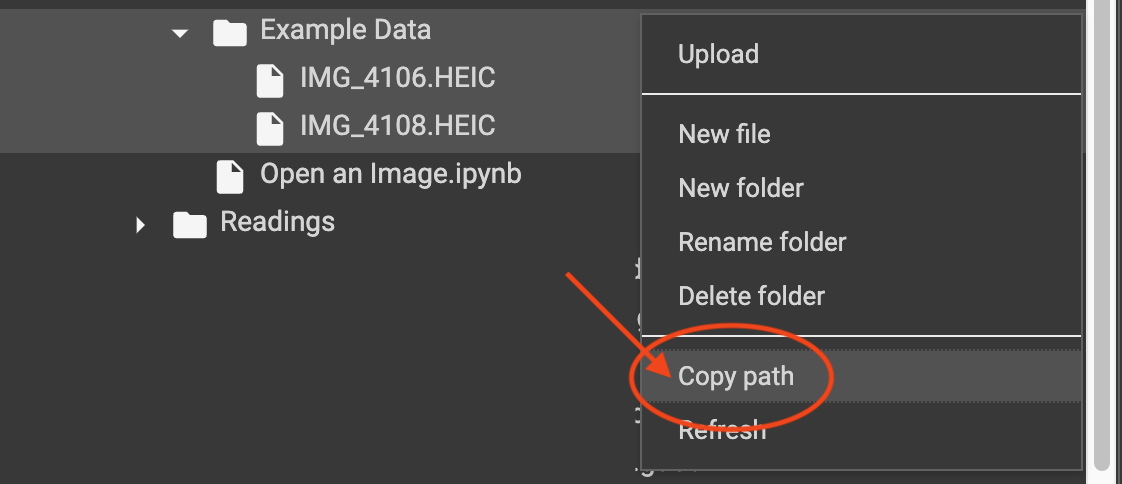


In [4]:
# Update the text in quotes with the path to your image data on Google Drive
# This will probably be somethiing like: "/content/drive/MyDrive/.../path/to/folder"
# Don't forget to run this cell!
directory = "Example Data"

The Colab notebook connects to your Google Drive as if it were mounted on the same computer.

You can list all the files in that folder using `os.listdir()` and a Python `for` loop:
- `os.listdir()` is a function that takes a single argument, a path to a directory, and returns a list of files in the directory.
- the `for` loop iterates over each file path, allowing us to `print()` them as we go


In [5]:
# Now you can access the files in that folder
print(f'Listing files in "{directory}" ...')
for filepath in os.listdir(directory):
    print(f" - {filepath}")

    # This filters out any unsupport non-image files
    if any(filepath.lower().endswith(ext) for ext in IMAGE_FILE_EXTENSIONS):
        img_file = filepath

Listing files in "Example Data" ...
 - IMG_3045.JPG
 - IMG_4106.HEIC
 - pluto.geojson
 - IMG_4108.HEIC
 - IMG_1605.HEIC


⚠ **If you get a FileNotFoundError**

*Make sure you update the path in `directory` with the path to the data folder in your mounted Google Drive, and run the cell to update the variable — before running this code.*

You can view the images using `PIL` — one of the libraries we installed earlier. `PIL` provides an `Image` class that we can use to open, view, and resize image files (and a lot more).

- `Image.open()` is a method on the `Image` class. A method is a function that belongs to a class. In this case, it opens the image file provided as the arguement.
- `Image.resize()` returns a copy of the `Image` with the specified dimensions.

Notice that notebooks will render the last line of the cell automatically. In this case, it renders the image.

Opening IMG_1605.HEIC ...


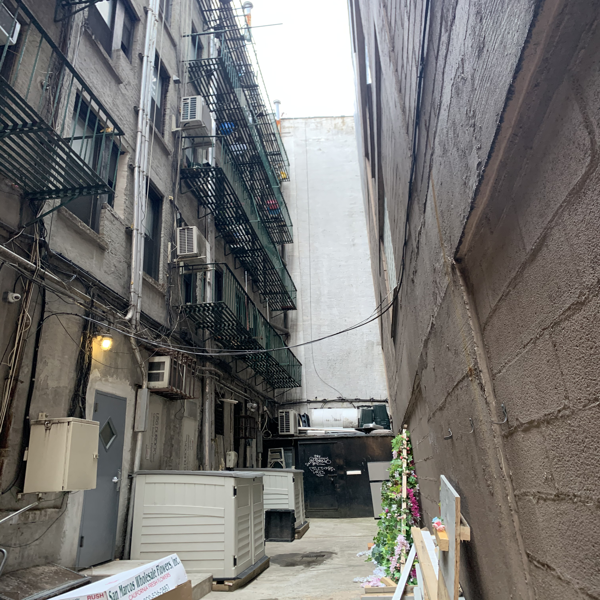

In [6]:
# Let's view the last file in the directory
# This creates a PIL Image object we can open
img = Image.open(Path(directory) / img_file)

# View the image at defined size
print(f"Opening {img_file} ...")
img.resize((600, 600))

## Viewing image metadata stored in EXIF tags
Viewing the image itself is just one form of exploring your data. Of course, images have metadata too — data about the data!

Digital images have [EXIF tags](https://en.wikipedia.org/wiki/Exif) that store additional information about the photograph. Your phone's camera app adds a lot of extra data in EXIF tag to each photo.

We can use `PIL` to view this information as well. This is a bit more involved than viewing the image itself.

We'll define a custom function `print_exit_info()` using the `def` keyword which uses class and methods included into the `PIL` library. Note that when you run a cell that just defines a function nothing appears to happen! This is working as intended. It simply creates the function for use later.

In [7]:
def print_exif_info(img_file):
    """A helper function that prints EXIF information."""

    print(f"\n===== EXIF Metadata for {img_file} =====")

    # Create a PIL Image object
    img = Image.open(img_file)

    # Get the EXIF metadata
    img_exif = img.getexif()

    # This for loop iterates over img_exif
    # img_exif is a dictionary — a set of key-value pairs
    # items() returns each pair one at a time
    for exif_tag, exif_value in img_exif.items():
        print(Base(exif_tag).name, exif_value)

    # In addition the base EXIF data, we can look for more IFDs
    # These are Image File Directories, and provide more info
    for ifd_id in IFD:
        # Not all images will have all IFDs!
        # The try here lets us view this info only if it exists
        try:
            ifd = img_exif.get_ifd(ifd_id)
            print(f"\n----- {ifd_id.name} -----")

            if ifd_id == IFD.GPSInfo:
                resolve = GPSTAGS
            else:
                resolve = TAGS

            for tag, value in ifd.items():
                tag_name = resolve.get(tag, tag)
                print(tag_name, value)

        except KeyError:
            pass

Let's try to run the created function, passing in a path to an image using `img_file`.

In [8]:
# Let's try to view the EXIF data for an image
print_exif_info(Path(directory) / img_file)


===== EXIF Metadata for Example Data/IMG_1605.HEIC =====
GPSInfo 2084
ResolutionUnit 2
ExifOffset 228
Make Apple
Model iPhone XS
Software 14.4.2
Orientation 1
DateTime 2021:04:04 14:53:54
YCbCrPositioning 1
XResolution 72.0
YResolution 72.0
HostComputer iPhone XS

----- Exif -----
ExifVersion b'0232'
ComponentsConfiguration b'\x01\x02\x03\x00'
ShutterSpeedValue 5.915456732763627
DateTimeOriginal 2021:04:04 14:53:54
DateTimeDigitized 2021:04:04 14:53:54
ApertureValue 1.6959938128383605
BrightnessValue 3.0788240439890027
ExposureBiasValue 0.0
MeteringMode 5
Flash 16
FocalLength 4.25
ColorSpace 65535
ExifImageWidth 4032
FocalLengthIn35mmFilm 26
SceneCaptureType 0
OffsetTime -04:00
OffsetTimeOriginal -04:00
OffsetTimeDigitized -04:00
SubsecTimeOriginal 418
SubjectLocation (2013, 1511, 2217, 1330)
SubsecTimeDigitized 418
ExifImageHeight 3024
SensingMethod 2
ExposureTime 0.016666666666666666
FNumber 1.8
SceneType b'\x01'
ExposureProgram 2
ISOSpeedRatings 100
ExposureMode 0
FlashPixVersion b

That's a lot of metadata! For this exercise, we really just want the GPS info. Let's create some more specific helper functions to do that.

In [10]:
GPS_LAT_REF = "GPSLatitudeRef"
GPS_LAT = "GPSLatitude"
GPS_LNG_REF = "GPSLongitudeRef"
GPS_LNG = "GPSLongitude"
GPS_ALT_REF = "GPSAltitudeRef"
GPS_ALT = "GPSAltitude"


def get_gps_info(img):
    """Prints EXIF information from an image."""

    # Get the EXIF metadata
    img_exif = img.getexif()

    try:
        print("info found!")
        gps_ifd = img_exif.get_ifd(IFD.GPSInfo)

        return {GPSTAGS.get(tag, tag): value for tag, value in gps_ifd.items()}
    except KeyError:
        print("no info found!")
        return None


def parse_degrees_to_decimals(degrees, reference):
    """Transforms angular degrees into decimal degrees."""

    if isinstance(reference, bytes):
        ref_from_bytes = int.from_bytes(reference, byteorder="big")
        sign = -1.0 if ref_from_bytes == 1 else 1.0
        return degrees * sign
    else:
        sign = -1.0 if reference in ("S", "W") else 1.0
        decimals = degrees[0] + degrees[1] / 60 + (degrees[2] / (60 * 100))
        return decimals * sign


def parse_gps_info(gps_info):
    """Gets decimal latitude, longitude, and altitude from GPS metadata."""

    if gps_info is None:
        return {"latitude": None, "longitude": None, "altitude": None}
    else:
        return {
            "latitude": parse_degrees_to_decimals(
                gps_info[GPS_LAT], gps_info[GPS_LAT_REF]
            ),
            "longitude": parse_degrees_to_decimals(
                gps_info[GPS_LNG], gps_info[GPS_LNG_REF]
            ),
            "altitude": parse_degrees_to_decimals(
                gps_info[GPS_ALT], gps_info[GPS_ALT_REF]
            ),
        }


def get_lat_lng_alt(img_file):
    """Gets decimal latitude, longitude, and altitude from an image file."""

    print(f"Looking for GPS metadata in {img_file.name} ...", end=" ")

    # Create a PIL Image object
    img = Image.open(img_file)

    gps_info = get_gps_info(img)
    return {
        "image_name": img_file.name,
        **parse_gps_info(gps_info),
    }

Again, after defining the functions and running the cell to create them, we can use them later.

In [11]:
# Get GPS data
gps_data = get_lat_lng_alt(Path(directory) / img_file)

# Print the GPS data
for k, v in gps_data.items():
    print(k, v)

Looking for GPS metadata in IMG_1605.HEIC ... info found!
image_name IMG_1605.HEIC
latitude 40.709495
longitude -73.99289333333333
altitude 13.448170047152159


To summarize:
- You uploaded images to Google Drive
- You accessed those images from your Colab notebok
- You opened the images using `PIL`
- ... and you retrieved GPS coordiantes from the image EXIF metadata!

Pretty cool 😀.

## Creating a datatable with Pandas
... but wait, there's more!

Getting the metadata is useful! But how do we organize, store, and view the data we got from our images in a structure way? The common solution is a two-dimensional table. Imagine a spreadsheet: your rows would be each image, and your columns might be the latitude, longitude, and altitude.

Something like:

| image_name | latitude | longitude | altitude |
| --- | --- | ---| --- |
| some_image>.jpg | 40.7 | -74.0 | 5.5 |

We can do that! `pandas` is a very popular library that lets you work with 2D data. These tables are referred to as `DataFrame` objects. Let's create a dataframe from your images.

First, we need to get GPS data for all the images. We do this by adding the data from each image to a Python list.

In [12]:
images_data = []

for filepath in os.listdir(directory):
    # This filters out any unsupported non-image files
    if any(filepath.lower().endswith(ext) for ext in IMAGE_FILE_EXTENSIONS):
        gps_data = get_lat_lng_alt(Path(directory) / filepath)
        images_data.append(gps_data)

Looking for GPS metadata in IMG_3045.JPG ... info found!
Looking for GPS metadata in IMG_4106.HEIC ... info found!
Looking for GPS metadata in IMG_4108.HEIC ... info found!
Looking for GPS metadata in IMG_1605.HEIC ... info found!


Now, we can use `pandas` to create a table (a `DataFrame` object) from that list of image data.

In [13]:
# We are construction a DataFrame from a list of dictionaries
# This is just one of many different ways to create a DataFrame.
df = pd.DataFrame(images_data)
df

,image_name,latitude,longitude,altitude
0,IMG_3045.JPG,40.707063,-74.004513,12.695103
1,IMG_4106.HEIC,40.724918,-74.002587,5.563342
2,IMG_4108.HEIC,40.724987,-74.002545,5.571528
3,IMG_1605.HEIC,40.709495,-73.992893,13.448170


You now have a small, structured dataset!

In [14]:
# A DataFrame has lots of built-in methods that are helpful for understanding data
# In this case, we can find the mean (average) of all the altitudes.
df["altitude"].mean()

9.319535712473648

We will spend more time later in the semester exploring how you can use Pandas in your workflow.

## Creating a geospatial datatable with GeoPandas
Tables are great! But as urban designers, we frequently want to create and view geospatial data with a geometric and geographic component.

`GeoPandas` is another popular library, which extends `Pandas` with geospatial functionality. Together, these two tools can do many of things you might otherwise have to do in dedicated GIS software.

Let's start by adding `geometry` column to our DataFrame. We will do this by constructing a `Point` for each image, using the latitude and longitude.

In [15]:
df["geometry"] = df.apply(lambda x: Point(x["longitude"], x["latitude"]), axis=1)
df

,image_name,latitude,longitude,altitude,geometry
0,IMG_3045.JPG,40.707063,-74.004513,12.695103,POINT (-74.00451333333334 40.70706333333333)
1,IMG_4106.HEIC,40.724918,-74.002587,5.563342,POINT (-74.00258666666667 40.724918333333335)
2,IMG_4108.HEIC,40.724987,-74.002545,5.571528,POINT (-74.002545 40.724986666666666)
3,IMG_1605.HEIC,40.709495,-73.992893,13.448170,POINT (-73.99289333333333 40.709495)


We can then transform the `DataFrame` into a `GeoDataFrame`. We need to include a Coordinate Reference System (CRS) which defines the [map projection](https://en.wikipedia.org/wiki/Map_projection) of the associated geospatial data. In our case, we are using [WGS 84](https://en.wikipedia.org/wiki/World_Geodetic_System) the project used for GPS coordinates.

In [16]:
# We can now construct a GeoDataFrame, and provide a CRS
gdf = gpd.GeoDataFrame(df, crs=4326)
gdf

,image_name,latitude,longitude,altitude,geometry
0,IMG_3045.JPG,40.707063,-74.004513,12.695103,POINT (-74.00451 40.70706)
1,IMG_4106.HEIC,40.724918,-74.002587,5.563342,POINT (-74.00259 40.72492)
2,IMG_4108.HEIC,40.724987,-74.002545,5.571528,POINT (-74.00254 40.72499)
3,IMG_1605.HEIC,40.709495,-73.992893,13.448170,POINT (-73.99289 40.70949)


## Plotting tabular and geospatial data
Let's take a look at our data on a map. We'll use some built-in data included in the `geoplot` library to start.

<Axes: >

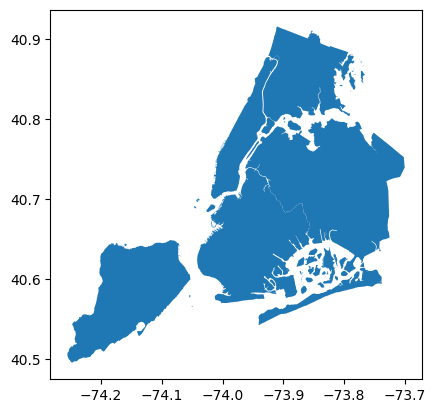

In [17]:
# Let's load in some data
nyc = gpd.read_file(geoplot.datasets.get_path("nyc_boroughs"))
nyc.plot()

We can use this as a basemap for the locations of each image.

<Axes: >

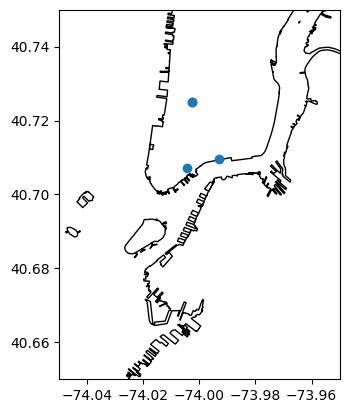

In [18]:
# Let's collage our data together
plt = pd.concat([gdf, nyc]).plot(facecolor="none")
plt.set_xlim(-74.05, -73.95)
plt.set_ylim(40.65, 40.75)
plt

And we can add additional datasets. In this case, we're using a GeoJSON file that shows a subset of [PLUTO data](https://www.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page) for downtown NYC.

You can get this data from GitHub [here](https://github.com/brian-ho/intro-to-urban-data/tree/main/Measure/Example%20Data). Remember to update the path below!

In [19]:
# Update the path to wherever you put the GeoJSON on Google Drive.
# This will probably be something like "/content/drive/MyDrive/.../path/to/folder/pluto.geojson"
pluto_gdf = gpd.read_file("Example Data/pluto.geojson")

<Axes: >

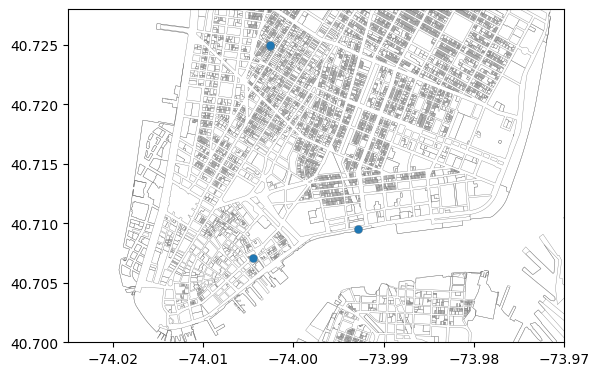

In [25]:
# Let's collage our data together again
plt = pd.concat([nyc, pluto_gdf, gdf]).plot(facecolor="none", lw=0.25, edgecolor="grey")
plt.set_xlim(-74.025, -73.97)
plt.set_ylim(40.70, 40.728)
plt

And you have a first view of some urban data! To recap:
 - You added each image to a table in `Pandas`, creating structured data as a `DataFrame`
 - You added a `Point` for each row in a `geometry` column
 - You converted the `DataFrame` into a `GeoDataFrame` usign `GeoPandas`
 - You loaded in additional data and plotted them

What do you notice about the plotted data?

And give this a try with your own collected data!